In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings

warnings.filterwarnings('ignore')

#Importing the data
df_credit = pd.read_csv("/Users/wandawu/Desktop/批借贷问题/german_credit_data.csv (1).xls")

In [2]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [3]:
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df_credit.nunique()


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [5]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)



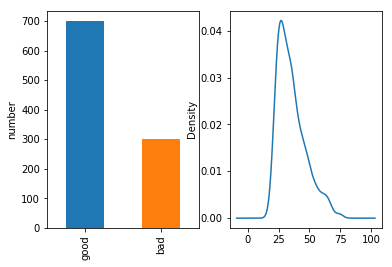

In [6]:
plt.subplot2grid((1,2),(0,0))
df_credit.Risk.value_counts().plot(kind='bar')
plt.ylabel(u'number')

plt.subplot2grid((1,2),(0,1))
df_credit.Age.plot(kind='kde')


Text(0.5,1,'bad')

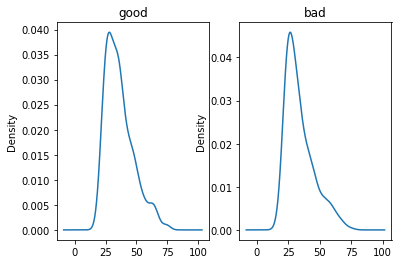

In [7]:

plt.subplot(121)
df_credit.Age[df_credit.Risk == 'good'].plot(kind='kde')
plt.title(u'good')
plt.subplot(122)
df_credit.Age[df_credit.Risk == 'bad'].plot(kind='kde')
plt.title(u'bad')

In [8]:
interval = (18, 25, 35, 60, 120)

label = ['Student', 'Adult', 'Senior', 'Old']
df_credit_age = pd.cut(df_credit.Age, interval, labels=label)


df_good = df_credit.Age_cat[df_credit.Risk == 'good'].value_counts()
df_bad = df_credit.Age_cat[df_credit.Risk == 'bad'].value_counts()
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult


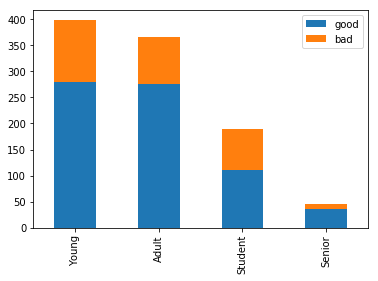

In [9]:
#look the credit risk in different age interval

df=pd.DataFrame({u'good':df_good, u'bad':df_bad})
df.plot(kind='bar',stacked=True)
#looks like the higher age the lower percentage of bad credit, it make scence

<Figure size 432x288 with 0 Axes>

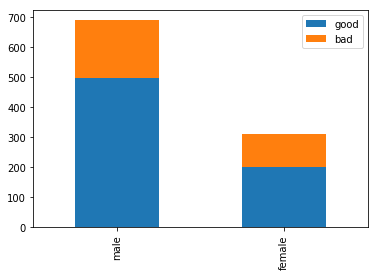

In [10]:
#now look at the sex
fig = plt.figure()
fig.set(alpha=0.2)  

Sex_g = df_credit.Sex[df_credit.Risk == 'good'].value_counts()
Sex_b = df_credit.Sex[df_credit.Risk == 'bad'].value_counts()

df=pd.DataFrame({u'good':Sex_g,u'bad':Sex_b})
df.plot(kind='bar',stacked=True)

df.to_csv('test.csv',index=True,header=True,sep=",")

#seems like that the female has higher bad risk ratio?

In [11]:
# get dummies of categorical variable
df_credit.head() 

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult


In [12]:
dummies_sex = pd.get_dummies(df_credit.Sex,prefix='Sex')
dummies_Housing = pd.get_dummies(df_credit.Housing,prefix='Housing')
dummies_Saving = pd.get_dummies(df_credit["Saving accounts"],prefix='Saving')
dummies_Checking = pd.get_dummies(df_credit["Checking account"],prefix='Checking')
dummies_Purpose = pd.get_dummies(df_credit.Purpose,prefix='Purpose')
dummies_Risk = pd.get_dummies(df_credit.Risk,prefix='Risk')
df_1 = pd.concat([df_credit,dummies_sex,dummies_Saving,dummies_Housing,dummies_Purpose,dummies_Risk,dummies_Checking],axis=1)

In [13]:
df_1.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,Checking_little,Checking_moderate,Checking_rich
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,...,0,0,1,0,0,0,1,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,...,0,0,1,0,0,1,0,0,1,0
2,2,49,male,1,own,little,NaN,2096,12,education,...,1,0,0,0,0,0,1,0,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,...,0,1,0,0,0,0,1,1,0,0
4,4,53,male,2,free,little,little,4870,24,car,...,0,0,0,0,0,1,0,1,0,0


In [14]:
df_1.drop(['Sex','Housing','Saving accounts','Checking account','Purpose','Age_cat','Risk','Risk_bad'],axis=1,inplace=True)

In [15]:
df_1.head()


,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Saving_little,Saving_moderate,Saving_quite rich,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good,Checking_little,Checking_moderate,Checking_rich
0,0,67,2,1169,6,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,22,2,5951,48,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,49,1,2096,12,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,45,2,7882,42,0,1,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,4,53,2,4870,24,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [17]:
# scaling  age, credit amount,duration
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df_1['Age_scaled'] = scaler.fit_transform(df_1['Age'].values.reshape(-1,1))
df_1['Creditamount_scaled'] = np.log(df_credit['Credit amount'])
df_1['Duration_scaled'] = scaler.fit_transform(df_1['Duration'].values.reshape(-1,1))


In [18]:
#select features we need from df_1

df_2 = df_1.filter(regex='Risk_good|Age_scaled|Job|Creditamount_scaled|Duration_scaled|Sex_.*|Saving_.*|Checking_.*|Purpose_.*|Housing_.*')

In [19]:
x = df_2.drop('Risk_good', 1).values
y = df_2['Risk_good'].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)

LR: 0.879984 (0.039302)
LDA: 0.861052 (0.039927)
KNN: 0.866149 (0.044271)
CART: 0.758434 (0.047949)
NB: 0.715407 (0.052256)
RF: 0.805679 (0.061819)
SVM: 0.971761 (0.024831)
XGB: 0.885911 (0.032338)


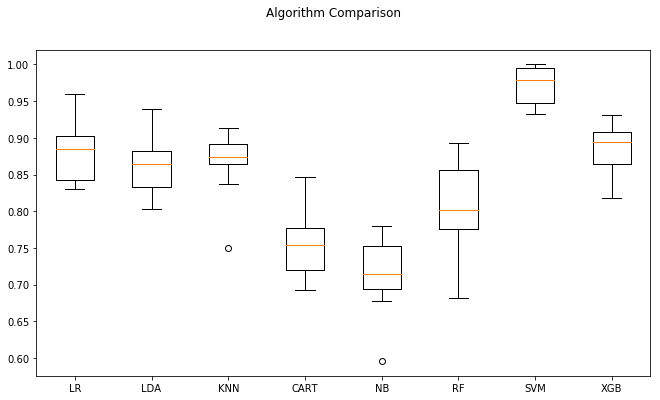

In [21]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# XGB model
# test set accuracy
XGB = XGBClassifier()

# Fitting with train data
model_XGB = XGB.fit(x_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model_XGB.score(x_train, y_train))

Training score data: 
0.8413333333333334


In [23]:
y_pred = model_XGB.predict(x_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.732


[[ 26  48]
 [ 19 157]]


              precision    recall  f1-score   support

           0       0.58      0.35      0.44        74
           1       0.77      0.89      0.82       176

   micro avg       0.73      0.73      0.73       250
   macro avg       0.67      0.62      0.63       250
weighted avg       0.71      0.73      0.71       250



In [24]:
# try random forest?
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model_RF = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model_RF, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9904761904761905, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.8952380952380953, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9428571428571428, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9615384615384616, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=1.0, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.9523809523809523, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.8857142857142857, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.9807692307692307, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.9809523809523809, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.9619047619047619, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_est

[CV]  max_depth=3, max_features=7, n_estimators=150, score=0.9903846153846154, total=   0.2s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.8761904761904762, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.8857142857142857, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.8095238095238095, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.8571428571428571, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.9134615384615384, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=5 ....................
[CV]  max_depth=3, ma

[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.8857142857142857, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.8857142857142857, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.9047619047619048, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.9519230769230769, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.9047619047619048, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.8571428571428571, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_dept

[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.9619047619047619, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.9523809523809523, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.8857142857142857, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.9238095238095239, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.9423076923076923, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.9428571428571428, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max

[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.8942307692307693, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.8952380952380953, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.8380952380952381, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.9047619047619048, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.9326923076923077, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=

[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.9142857142857143, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.9238095238095239, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.8857142857142857, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.9428571428571428, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.9038461538461539, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=50 ....................
[CV]  max_depth=7, max_features=7, n_estimators=50, score=0.9142857142857143, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=50 ....................
[CV]  max_depth=7, max

[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.8846153846153846, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth=7, max_features=20, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth=7, max_features=20, n_estimators=25, score=0.8857142857142857, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth=7, max_features=20, n_estimators=25, score=0.7714285714285715, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth=7, max_features=20, n_estimators=25, score=0.8761904761904762, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth=7, max_features=20, n_estimators=25, score=0.8942307692307693, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=50 ...................
[CV]  max_depth=

[CV]  max_depth=10, max_features=7, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.9047619047619048, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.8952380952380953, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.780952380952381, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.9142857142857143, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.9038461538461539, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_featur

[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.7047619047619048, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=10 ..................
[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.8285714285714286, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=10 ..................
[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.8365384615384616, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.8571428571428571, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.8761904761904762, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.7142857142857143, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_

[CV]  max_depth=None, max_features=7, n_estimators=25, score=0.8761904761904762, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=25 .................
[CV]  max_depth=None, max_features=7, n_estimators=25, score=0.9047619047619048, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=25 .................
[CV]  max_depth=None, max_features=7, n_estimators=25, score=0.7428571428571429, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=25 .................
[CV]  max_depth=None, max_features=7, n_estimators=25, score=0.9142857142857143, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=25 .................
[CV]  max_depth=None, max_features=7, n_estimators=25, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=50 .................
[CV]  max_depth=None, max_features=7, n_estimators=50, score=0.8857142857142857, total=   0.1s
[CV] max_depth=None, max_features=7, n_estimators=50 .................
[CV]  max_depth=N

[CV]  max_depth=None, max_features=20, n_estimators=10, score=0.780952380952381, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=10 ................
[CV]  max_depth=None, max_features=20, n_estimators=10, score=0.8365384615384616, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=25 ................
[CV]  max_depth=None, max_features=20, n_estimators=25, score=0.8476190476190476, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=25 ................
[CV]  max_depth=None, max_features=20, n_estimators=25, score=0.8571428571428571, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=25 ................
[CV]  max_depth=None, max_features=20, n_estimators=25, score=0.7428571428571429, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=25 ................
[CV]  max_depth=None, max_features=20, n_estimators=25, score=0.8285714285714286, total=   0.1s
[CV] max_depth=None, max_features=20, n_estimators=25 ................

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   38.9s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
rf = RandomForestClassifier(max_depth=3, max_features=4, n_estimators=150, random_state=2)
#trainning with the best params
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [26]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(x_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))
trees = 150
print("random forest with %d trees:"%trees) 
print("accuracy on the training subset:{:.3f}".format(rf.score(x_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rf.score(x_test,y_test)))
print('Feature importances:{}'.format(rf.feature_importances_))

0.704


[[  1  73]
 [  1 175]]


0.9191176470588236
random forest with 150 trees:
accuracy on the training subset:0.716
accuracy on the test subset:0.704
Feature importances:[0.02177108 0.01652048 0.01391179 0.07301189 0.00476583 0.00673695
 0.02641092 0.00717594 0.04424453 0.02073616 0.0217267  0.00569307
 0.00638659 0.00703239 0.00555583 0.02088415 0.00367999 0.00473603
 0.25309015 0.03620854 0.00580067 0.09276675 0.16711381 0.13403974]


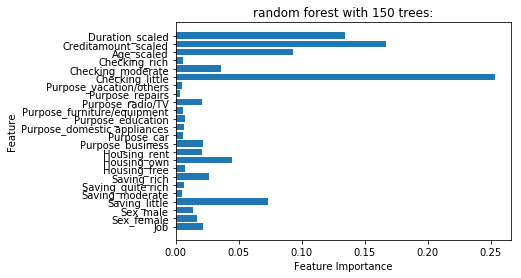

,Job,Sex_female,Sex_male,Saving_little,Saving_moderate,Saving_quite rich,Saving_rich,Housing_free,Housing_own,Housing_rent,...,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Checking_little,Checking_moderate,Checking_rich,Age_scaled,Creditamount_scaled,Duration_scaled
0,2,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.766456,7.063904,-1.236478
1,2,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,-1.191404,8.691315,2.248194
2,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.183312,7.647786,-0.738668
3,2,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0.831502,8.972337,1.750384
4,2,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1.535122,8.490849,0.256953


In [27]:
x1 = df_2.drop('Risk_good', 1)
lx1 = x1.columns
n_features=x1.shape[1]
plt.barh(range(n_features),rf.feature_importances_,align='center')
plt.yticks(np.arange(n_features),lx1)
plt.title("random forest with %d trees:"%trees)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
x1.head()
# duration, creditamount,checking is little,house own, saving is little are main features effect personal risk

In [28]:
#SVM
# test set accuracy
SVM = SVC(gamma='auto')

# Fitting with train data
model_SVM = SVM.fit(x_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model_SVM.score(x_train, y_train))

Training score data: 
0.7386666666666667


In [49]:


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
clf = GridSearchCV(SVM, parameters, scoring='f1')
clf.fit(x_train, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)


The parameters of the best model are: 
{'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}


In [82]:
SVM = SVC(C= 1, gamma= 0.25, kernel= 'rbf')
y_pred = model_SVM.predict(x_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.728


[[  9  65]
 [  3 173]]


              precision    recall  f1-score   support

           0       0.75      0.12      0.21        74
           1       0.73      0.98      0.84       176

   micro avg       0.73      0.73      0.73       250
   macro avg       0.74      0.55      0.52       250
weighted avg       0.73      0.73      0.65       250



In [30]:
# GAussianNB
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(x_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model.score(x_train, y_train))

Training score data: 
0.6786666666666666


In [31]:
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))


0.644


[[ 42  32]
 [ 57 119]]


              precision    recall  f1-score   support

           0       0.42      0.57      0.49        74
           1       0.79      0.68      0.73       176

   micro avg       0.64      0.64      0.64       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.68      0.64      0.66       250



In [32]:
#xgbooster XGBClassifier has best performance

In [33]:
# let's do model stacking!
train= np.column_stack((x_train,y_train))
test = np.column_stack((x_test, y_test))

In [75]:
LR= LogisticRegression()
LDA= LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(C = 0.1, gamma = 0.05, kernel= 'rbf')
XGB = XGBClassifier()
RF = RandomForestClassifier(max_depth=3, max_features=4, n_estimators=150, random_state=2)

In [76]:
import numpy as np
from sklearn.model_selection import KFold
def get_stacking(clf, x_train, y_train, x_test, n_folds=10):
    
    train_num, test_num = x_train.shape[0], x_test.shape[0]
    second_level_train_set = np.zeros((train_num,))
    second_level_test_set = np.zeros((test_num,))
    test_nfolds_sets = np.zeros((test_num, n_folds))
    kf = KFold(n_splits=n_folds)

    for i,(train_index, test_index) in enumerate(kf.split(x_train)):
        x_tra, y_tra = x_train[train_index], y_train[train_index]
        x_tst, y_tst =  x_train[test_index], y_train[test_index]

        clf.fit(x_tra, y_tra)

        second_level_train_set[test_index] = clf.predict(x_tst)
        test_nfolds_sets[:,i] = clf.predict(x_test)

    second_level_test_set[:] = test_nfolds_sets.mean(axis=1)
    return second_level_train_set, second_level_test_set

In [77]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC


In [78]:
train_sets = []
test_sets = []
train_x = x_train
train_y = y_train
test_x = x_test

for clf in [SVM, XGB, LR, LDA, RF]:
    train_set, test_set = get_stacking(clf, train_x, train_y, test_x)
    train_sets.append(train_set)
    test_sets.append(test_set)

meta_train = np.concatenate([result_set.reshape(-1,1) for result_set in train_sets], axis=1)
meta_test = np.concatenate([y_test_set.reshape(-1,1) for y_test_set in test_sets], axis=1)

In [79]:
meta_train = np.concatenate([result_set.reshape(-1,1) for result_set in train_sets], axis=1)
meta_test = np.concatenate([y_test_set.reshape(-1,1) for y_test_set in test_sets], axis=1)
#set up XGB as sencondary classfier model


XGB.fit(meta_train, train_y)
df_predict = XGB.predict(meta_test)

print(df_predict)

[1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1]


In [80]:
print(accuracy_score(y_test,df_predict))
print("\n")
print(confusion_matrix(y_test, df_predict))
print("\n")
print(classification_report(y_test, df_predict))


0.732


[[ 34  40]
 [ 27 149]]


              precision    recall  f1-score   support

           0       0.56      0.46      0.50        74
           1       0.79      0.85      0.82       176

   micro avg       0.73      0.73      0.73       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.72      0.73      0.72       250

